## Independent Data Exploration

This is the independent exploration project for Data 8. Please refer to Piazza and the Policies page for details on the project. Enter all of your code cells here for submission! You can either use this notebook directly or add the contents of this notebook to your own project notebook named `exploration.ipynb`. The following cell is required to submit.

In [2]:
from datascience import *
import numpy as np
np.set_printoptions(threshold=np.nan)

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
_ = ok.auth(inline=True)

Assignment: Independent Data Exploration
OK, version v1.12.5

Successfully logged in as omkar.shanbhag@berkeley.edu


## 1. Independent Data Exploration


In [5]:
#Imported dataset of Health statistics of all counties in the US. 
#Contains things like Percentage of Diabetic/Obese Adults per county in various years 
counties_health = Table.read_table("Counties_Health.csv")
counties_health

FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
1001,AL,Autauga,11.4,13,31.5,34.1,25.4,4,5,25,0.0738894,0.0902609,22.1568
1003,AL,Baldwin,9.8,10.4,26.2,27.4,25.4,18,25,38.8889,0.100331,0.124931,24.5184
1005,AL,Barbour,13.6,18.4,37.6,44.4,25.4,1,0,-100,0.0361572,0,-100
1007,AL,Bibb,11.1,14.8,32.3,40.3,25.4,1,1,0,0.0435901,0.0444326,1.93282
1009,AL,Blount,11.4,14.1,31.9,34.6,25.4,3,3,0,0.0523186,0.051976,-0.654897
1011,AL,Bullock,14.9,19.6,37.8,43,25.4,0,0,0,0,0,0
1013,AL,Butler,15.1,17.7,36.8,36.3,25.4,0,1,nan,0,0.0492708,nan
1015,AL,Calhoun,14.5,14.9,33.5,32.2,25.4,7,7,0,0.0591401,0.0603886,2.11101
1017,AL,Chambers,16.1,16.4,35.5,39.7,25.4,2,0,-100,0.0581666,0,-100
1019,AL,Cherokee,13.6,13.3,31.5,33.6,25.4,1,1,0,0.0386787,0.0384069,-0.702846


In [6]:
#Imported dataset of Socioeconomic statistics of all counites in the US. 
#Contains things like the Ethnic Demographics per county and the Poverty Rates per county as well as whether each county is categorized as a Persistantly Poverty Stricken county
counties_socio = Table.read_table("Counties_Socioeconomic.csv")
counties_socio

FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
1001,AL,Autauga,77.2462,17.5826,2.40054,0.855766,0.397647,0.0403145,11.9954,26.778,56580,12.7,0,18.8,0,1,0
1003,AL,Baldwin,83.5048,9.30842,4.38482,0.735193,0.628755,0.0433435,16.7712,22.9874,52387,12.9,0,19.6,0,1,0
1005,AL,Barbour,46.7531,46.6912,5.05154,0.3897,0.218524,0.0874094,14.2368,21.907,31433,32,1,45.2,1,0,0
1007,AL,Bibb,75.0207,21.9245,1.77177,0.096007,0.279293,0.0305477,12.6816,22.6969,40767,22.2,0,29.3,1,1,0
1009,AL,Blount,88.8873,1.26304,8.0702,0.200621,0.497191,0.0314016,14.7221,24.6084,50487,14.7,0,22.2,0,1,0
1011,AL,Bullock,21.9168,69.9743,7.1193,0.183251,0.183251,0.0366502,13.4598,22.265,28251,39.6,1,51.2,1,0,0
1013,AL,Butler,54.0602,43.19,0.911825,0.830668,0.281663,0.0334177,16.6563,24.1371,33868,25.8,1,36,1,0,1
1015,AL,Calhoun,73.6135,20.3901,3.28324,0.699997,0.404817,0.0792767,14.3288,22.8772,42091,20,0,30.7,0,1,0
1017,AL,Chambers,58.1412,38.5971,1.56656,0.485167,0.166594,0.0204589,16.6769,22.5135,35560,22.4,0,34.4,1,0,1
1019,AL,Cherokee,92.0736,4.64042,1.23129,0.188541,0.469429,0.00384778,17.896,21.4168,39144,19.4,0,30.2,0,0,0


Description of Dataset 

The above two tables come from a dataset accumulated by the 'Food Environment Atlas' on statistics for all of the counties in the USA. The two tables we selected to analyze contained data that illustrates the Health and Socioeconomic states of each county. The health table includes column like the Adult Diabetes and Obesity rates for various years. The Socioeconomics table includes the demographics of counties as well as the poverty rates and whether or not a county is considered to have persistant poverty or persistant child poverty. We think that using these two subsets of the dataset, we might be able to find an interesting correlation that we can expand upon using the skills that we have learnt in this class. 

In [7]:
#Both datasets above contain information for all counties. 
#This table created below joins both of them together to create a comprehensive dataset
counties_socio_health = counties_socio.join('FIPS', counties_health)
counties_socio_health = counties_socio_health.drop('State_2', 'County_2')

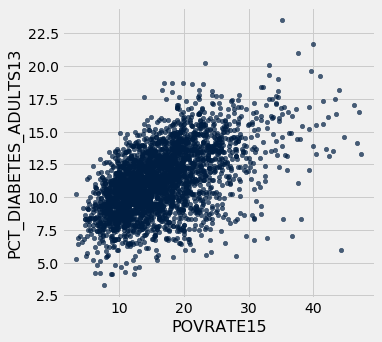

In [8]:
#Scatterplot of Poverty Rate per county vs Percentage of Diabetic Adults per county
counties_socio_health.scatter('POVRATE15', 'PCT_DIABETES_ADULTS13')

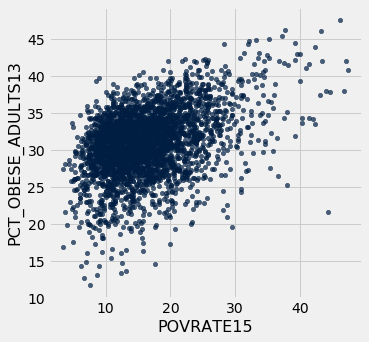

In [9]:
#Scatterplot of Poverty Rate per county vs Percentage Of Obese Adults per county 
counties_socio_health.scatter('POVRATE15', 'PCT_OBESE_ADULTS13')

In [10]:
#Converts an array into standard units 
def convert_to_std(array): 
    return (array - np.nanmean(array))/np.nanstd(array)

#Calculates the correlation between two arrays. 
#Uses the 'convert_to_std' function defined above in its body. 
def correlation(array1 ,array2): 
    su_1 = convert_to_std(array1)
    su_2 = convert_to_std(array2)
    return np.nanmean(np.multiply(su_1, su_2))


In [11]:
#Calculates the correlation (r) of between Poverty Rates and Percentage of Adult Diabetics per county
#Uses functions above 
correlation(counties_socio_health.column('POVRATE15'), counties_socio_health.column('PCT_DIABETES_ADULTS13'))

0.52997562390279118

In [12]:
#Calculates the correlation (r) of between Poverty Rates and Percentage of Obese adults per county
#Uses functions above 
correlation(counties_socio_health.column('POVRATE15'), counties_socio_health.column('PCT_OBESE_ADULTS13'))

0.40711867415508113

Observational description of Visualization of QUANTITATIVE variable in data

The above few cells include visualizations of quantitative data that displayed a significant positive correlation which we thought was interesting and worth investigating. This comprehensive dataset which we found on the website of the 'Food Environment Atlas' had a lot of data tables with data on all counties in the USA. From that dataset we took tables with data on the SocioEconomic state of the counties as well as the Health statistics of the counties and then joined the table using the 'FIPS' column which contained a unique ID for each county. First we plotted the Poverty Rate in each county against the percentage of adult diabetics in the same counties on a scatterplot, and found that there seemed to be a correlation between them. We then plotted the Poverty Rate in each county against the percentage of obese adults on a scatterplot and also found something that resembled a correlation. We wanted to see the strength of the correlation so we calculated the r values and found them to be ~.53 and ~.41 respectively. 

In [13]:
#condense the table into only relevant information by using the 'select' function to only take the columns that were relevant to our investigation
counties_condensed = counties_socio_health.select('FIPS', 'State', 'County', 'POVRATE15', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13')
counties_condensed

FIPS,State,County,POVRATE15,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13
1001,AL,Autauga,12.7,13,34.1
1003,AL,Baldwin,12.9,10.4,27.4
1005,AL,Barbour,32,18.4,44.4
1007,AL,Bibb,22.2,14.8,40.3
1009,AL,Blount,14.7,14.1,34.6
1011,AL,Bullock,39.6,19.6,43
1013,AL,Butler,25.8,17.7,36.3
1015,AL,Calhoun,20,14.9,32.2
1017,AL,Chambers,22.4,16.4,39.7
1019,AL,Cherokee,19.4,13.3,33.6


Observational description of Summarized data using JOINING

The cell above is a summary or a condensed version of the JOINED dataset which only contains the columns that are relevant to our investigation (mainly, Poverty rates, Adult Diabetics rates and Adult Obesity rates). We created it by using the 'select' function on our dataset to only take the relevant columns which showed correlations. We will use this table to explore the correlations between poverty rates and obesity/diabetes (variables from two different tables on the same counties) and potentially come up with Null and Alternative Hypotheses as well as a predictive model. 

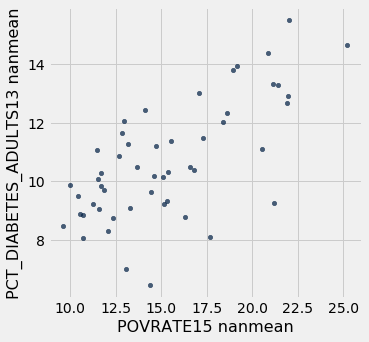

In [14]:
#Scatter plot of means (grouped by state, excluding 'nan' values)
counties_grouped = counties_condensed.group('State', np.nanmean)
counties_grouped.scatter('POVRATE15 nanmean', 'PCT_DIABETES_ADULTS13 nanmean')

In [52]:
counties_grouped = counties_condensed.group('State', np.nanmean)
counties_grouped 

State,FIPS nanmean,County nanmean,POVRATE15 nanmean,PCT_DIABETES_ADULTS13 nanmean,PCT_OBESE_ADULTS13 nanmean,High Poverty nanmean,High Diabetes nanmean
AK,2153.52,,13.0857,7.01724,31.369,0.344828,0
AL,1067,,22.0075,15.4896,36.1284,0.880597,0.955224
AR,5075,,21.1627,13.308,35.8987,0.92,0.96
AZ,4013.87,,20.52,11.0933,28.7733,0.866667,0.466667
CA,6058,,16.2948,8.77414,24.131,0.568966,0.0172414
CO,8062.23,,14.3688,6.48281,20.6828,0.34375,0
CT,9008,,9.6125,8.475,25.5875,0,0
DC,11001,,17.7,8.1,22.4,1,0
DE,10003,,12.8667,11.6667,30.5,0,0.666667
FL,12067.9,,18.397,12.0343,29.8179,0.656716,0.716418


In [53]:
#Calculate the correlation value between the averaged Adult Diabetes Rates grouped by states and the average poverty rate Grouped States per county 
pov_dia_corr = correlation(counties_grouped.column('POVRATE15 nanmean'), counties_grouped.column('PCT_DIABETES_ADULTS13 nanmean'))
pov_dia_corr

0.68306892188204393

Observational description of Summarized data using GROUPING 

The above graph and table are the result of GROUPING the data by state. The graph plotted the Adult Diabetes Rate vs the Poverty rates in counties grouped by states. Only the columns that are relevant to our investigation are including. The grouping helped because it removed a lot of the variation induced by random counties and increased the correlation from around .53 to .68. This helps better illustrate one of the the correlations that we are trying to highlight in this project. The higher correlation of this grouped dataset will make it easier to use in a regression line based prediction model 

Description of Prediction Problem: 

We wanted to see if we could use the poverty rate of a county to predict the diabetes rate of that county (if there was some form of linear relationship/correlation). First, we created a scatter plot of  the poverty rate and the percentage of adult diabetics. Then we found the correlation (r) value between these two variables, using a function we defined previously. Since these two variables had a relatively significant correlation, we decided to use the linear regression prediction technique. We used the value of r and the arrays of the two tables to construct a fit line by finding the slope and intercept of this line. To determine whether our data followed a regression model, we decided to construct a confidence interval of the true slope of the true line by bootstrapping the scatter plot 1000 times and finding a 95% confidence interval. Since the interval we found did not contain zero, this means that the true slope is not perfectly flat and there is some linear association in the scatter plot and therefore, a linear regression can be used for prediction at a 95% confidence level. 

In [39]:
slope = pov_dia_corr*(np.std(counties_grouped.column('PCT_DIABETES_ADULTS13 nanmean'))/np.std(counties_grouped.column('POVRATE15 nanmean')))
intercept = np.average(counties_grouped.column('PCT_DIABETES_ADULTS13 nanmean')) - slope*np.average(counties_grouped.column('POVRATE15 nanmean'))
fit_line_pov_dia = make_array(slope, intercept)
fit_line_pov_dia

array([ 0.35048059,  5.30455545])

In [33]:
def fit_line(correlation, array_x, array_y):
    slope = correlation*(np.std(array_y)/np.std(array_x))
    intercept = np.average(array_y) - slope*np.average(array_x)
    return make_array(slope, intercept)
fit_line(pov_dia_corr, counties_grouped.column('POVRATE15 nanmean'), counties_grouped.column('PCT_DIABETES_ADULTS13 nanmean'))

array([ 0.35048059,  5.30455545])

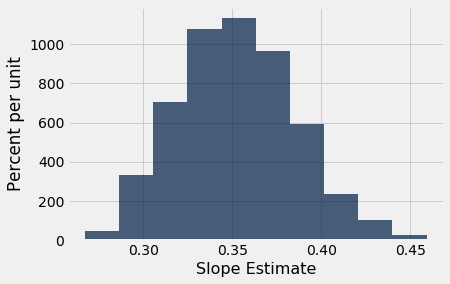

In [35]:
resample_slopes = make_array()
for i in np.arange(1000):
    sample = counties_grouped.sample()
    resample_line = fit_line(pov_dia_corr, sample.column('POVRATE15 nanmean'), sample.column('PCT_DIABETES_ADULTS13 nanmean'))
    resample_slope = resample_line.item(0)
    resample_slopes = np.append(resample_slopes, resample_slope)

Table().with_column('Slope Estimate', resample_slopes).hist()

In [36]:
lower_end = percentile(2.5, resample_slopes)
upper_end = percentile(97.5, resample_slopes)
confidence_int = make_array(lower_end, upper_end)
confidence_int

array([ 0.29576974,  0.42070266])

In [48]:
pov_rates = counties_grouped.column("POVRATE15 nanmean")
dia_rates = counties_grouped.column("PCT_DIABETES_ADULTS13 nanmean")
predictions = pov_rates * fit_line_pov_dia[0] + fit_line_pov_dia[1]
pred_table = Table().with_columns("Poverty Rates", pov_rates, 
                                  "Diabetes Rates", dia_rates,
                                  "Predicted Diabetes Rates", predictions)
error = (pred_table.column("Predicted Diabetes Rates") - pred_table.column("Diabetes Rates"))/pred_table.column("Diabetes Rates") * 100
pred_table = pred_table.with_column("Percent Error", error)
pred_table

Poverty Rates,Diabetes Rates,Predicted Diabetes Rates,Percent Error
13.0857,7.01724,9.89084,40.9506
22.0075,15.4896,13.0177,-15.9579
21.1627,13.308,12.7217,-4.40593
20.52,11.0933,12.4964,12.648
16.2948,8.77414,11.0156,25.546
14.3688,6.48281,10.3405,59.5067
9.6125,8.475,8.67355,2.34277
17.7,8.1,11.5081,42.0748
12.8667,11.6667,9.81407,-15.8794
18.397,12.0343,11.7524,-2.3431


In [49]:
avg_error = np.mean(pred_table.column("Percent Error"))
avg_error

2.0597457135301904

Prediction Problem Conclusion 

Using our linear regression fit line, we constructed an array of fitted values of diabetes rates to the values of poverty rates in our table and added this array, as well as an array that calculated the percent error between our predicted and true values, to the original table. We found the average error of our predictions to  be approximately 2%, illustrating that this linear regression prediction is fairly accurate.

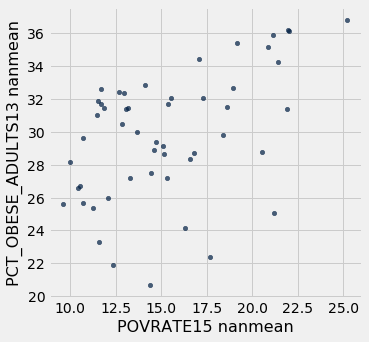

In [17]:
#Calculate the correlation value between the averaged Adult Obesity Rates grouped by states and the average poverty rate Grouped States per county 
counties_grouped.scatter('POVRATE15 nanmean', 'PCT_OBESE_ADULTS13 nanmean')

In [18]:
correlation(counties_grouped.column('POVRATE15 nanmean'), counties_grouped.column('PCT_OBESE_ADULTS13 nanmean'))

0.4797753753029404

In [19]:
cutoff = np.nanmedian(counties_socio_health.column('PCT_OBESE_ADULTS13'))
counties_categorical = counties_socio_health.select('FIPS', 'State', 'County', 'POVRATE15', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'PERPOV10')
counties_grouped_2 = counties_categorical.group('State', np.nanmean)
obese_states = counties_grouped_2.where('PCT_OBESE_ADULTS13 nanmean', are.above(cutoff))
obese_states

State,FIPS nanmean,County nanmean,POVRATE15 nanmean,PCT_DIABETES_ADULTS13 nanmean,PCT_OBESE_ADULTS13 nanmean,PERPOV10 nanmean
AK,2153.52,,13.0857,7.01724,31.369,0.0689655
AL,1067,,22.0075,15.4896,36.1284,0.283582
AR,5075,,21.1627,13.308,35.8987,0.226667
GA,13161.5,,21.9126,12.6868,31.3937,0.301887
IA,19099,,11.7121,10.2798,32.5818,0
IN,18092,,12.9598,12.0424,32.363,0
KS,20105,,12.6962,10.879,32.4343,0
KY,21120,,21.4075,13.2675,34.23,0.333333
LA,22064,,21.9469,12.8938,36.1766,0.40625
MI,26083,,15.5169,11.3711,32.0819,0


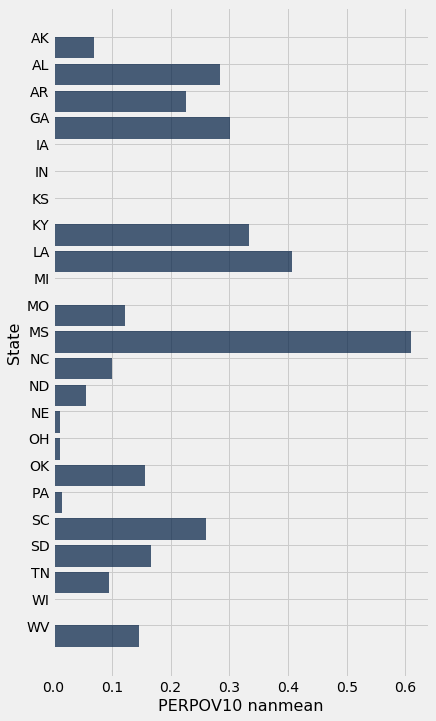

In [20]:
obese_states.barh('State', 'PERPOV10 nanmean')

In [21]:
healthy_states = counties_grouped_2.where('PCT_OBESE_ADULTS13 nanmean', are.below_or_equal_to(cutoff))
healthy_states

State,FIPS nanmean,County nanmean,POVRATE15 nanmean,PCT_DIABETES_ADULTS13 nanmean,PCT_OBESE_ADULTS13 nanmean,PERPOV10 nanmean
AZ,4013.87,,20.52,11.0933,28.7733,0.133333
CA,6058,,16.2948,8.77414,24.131,0
CO,8062.23,,14.3688,6.48281,20.6828,0.046875
CT,9008,,9.6125,8.475,25.5875,0
DC,11001,,17.7,8.1,22.4,0
DE,10003,,12.8667,11.6667,30.5,0
FL,12067.9,,18.397,12.0343,29.8179,0.0597015
HI,15005,,12.35,8.76,21.9,0
ID,16044,,15.1523,9.23864,28.675,0.0227273
IL,17102,,13.6873,10.5059,29.9667,0.0294118


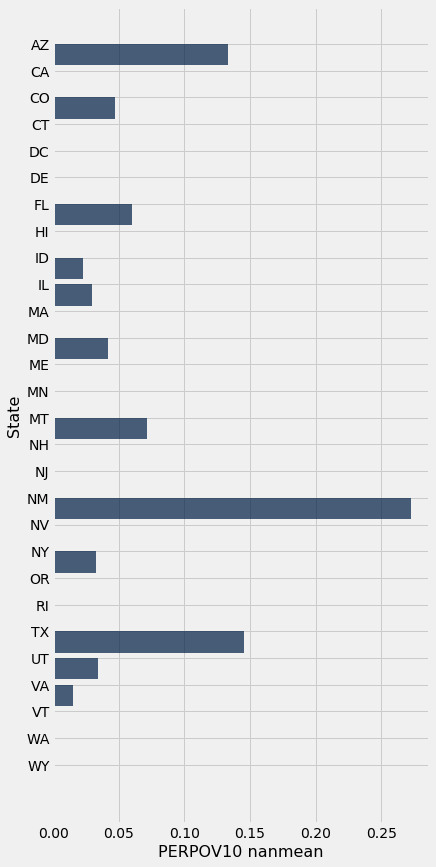

In [22]:
healthy_states.barh('State', 'PERPOV10 nanmean')

Observational Description of Visualization of CATEGORICAL variable in data

We used a horizontal bar chart to visualize the relationship between states and rates of persistent poverty in 2010.
We first found and used the median obesity rate to seperate states into 2 categories, obese and healthy, based on whether their obesity rates fell above or below the median. Then, we created 2 horizontal bar charts to visualize persistent poverty rates of states in the obese states category and in the healthy states category. Viewing both bar charts illustrates that category of states above the median obesity rate have higher persistent poverty rates and a higher percentage of states have persistent poverty generally while the category of states below the median obesity rate have lower persistent poverty rates and less states have persistent poverty at all.

Null Hypothesis: The distribution of High Poverty and Low Poverty counties is the same in High Diabetes counties as it is in the entire Dataset. I.E. 50.2% of High Diabetes counties have High Poverty. Any variation is due to chance. 

Alternative Hypothesis: The distribution of High Poverty and Low Poverty counties is NOT the same in High Diabetes counties as it is in the entire Dataset. The number of High Diabetes counties that have High Poverty is not 50.2%. 

In [23]:
counties_condensed

FIPS,State,County,POVRATE15,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13
1001,AL,Autauga,12.7,13,34.1
1003,AL,Baldwin,12.9,10.4,27.4
1005,AL,Barbour,32,18.4,44.4
1007,AL,Bibb,22.2,14.8,40.3
1009,AL,Blount,14.7,14.1,34.6
1011,AL,Bullock,39.6,19.6,43
1013,AL,Butler,25.8,17.7,36.3
1015,AL,Calhoun,20,14.9,32.2
1017,AL,Chambers,22.4,16.4,39.7
1019,AL,Cherokee,19.4,13.3,33.6


In [24]:
pov_med = np.nanmedian(counties_condensed.column('POVRATE15'))
dia_med = np.nanmedian(counties_condensed.column('PCT_DIABETES_ADULTS13'))

high_pov = make_array()
for val in counties_condensed.column('POVRATE15'):
    if val >= pov_med:
        high_pov = np.append(high_pov, 1)
    else:
        high_pov = np.append(high_pov, 0)

high_dia = make_array()
for val in counties_condensed.column('PCT_DIABETES_ADULTS13'):
    if val >= dia_med:
        high_dia = np.append(high_dia, 1)
    else:
        high_dia = np.append(high_dia, 0)

counties_condensed = counties_condensed.with_columns("High Poverty", high_pov, 
                                "High Diabetes", high_dia)
p_high_pov = counties_condensed.where('High Poverty', are.equal_to(1)).num_rows / counties_condensed.num_rows
p_low_pov = 1 - p_high_pov
p_high_dia = counties_condensed.where('High Diabetes', are.equal_to(1)).num_rows / counties_condensed.num_rows
p_low_dia = 1 - p_high_dia

hypothesis_table = Table().with_columns('High Diabetes', make_array('Yes', 'No'),
                                       'All Counties', make_array(p_high_dia, p_low_dia),)
hypothesis_table

High Diabetes,All Counties
Yes,0.506841
No,0.493159


In [25]:
hypothesis_table_1 = Table().with_columns('High Poverty', make_array('Yes', 'No'),
                                       'All Counties', make_array(p_high_pov, p_low_pov),)
hypothesis_table_1

High Poverty,All Counties
Yes,0.502386
No,0.497614


In [26]:
high_dia_table = counties_condensed.where('High Diabetes', are.equal_to(1))
high_dia_table

FIPS,State,County,POVRATE15,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,High Poverty,High Diabetes
1001,AL,Autauga,12.7,13,34.1,0,1
1005,AL,Barbour,32,18.4,44.4,1,1
1007,AL,Bibb,22.2,14.8,40.3,1,1
1009,AL,Blount,14.7,14.1,34.6,0,1
1011,AL,Bullock,39.6,19.6,43,1,1
1013,AL,Butler,25.8,17.7,36.3,1,1
1015,AL,Calhoun,20,14.9,32.2,1,1
1017,AL,Chambers,22.4,16.4,39.7,1,1
1019,AL,Cherokee,19.4,13.3,33.6,1,1
1021,AL,Chilton,20.2,13.3,35.9,1,1


In [27]:
test_statistic = hypothesis_table_1.column('All Counties').item(0)
test_statistic

0.5023862551702195

In [28]:
high_pov_samples = make_array()

for i in np.arange(5000):
    high_pov_samples = np.append(high_pov_samples, np.mean(np.random.choice(high_dia_table.column('High Poverty'), high_dia_table.num_rows)))

confidence_int = make_array(percentile(0.5, high_pov_samples), percentile(99.5, high_pov_samples))
confidence_int

array([ 0.66666667,  0.72630257])


The test statistic of the proportion of high Poverty counties with high diabetes areas does not fall in the range of our 99% confidence interval of [ 0.66666667,  0.72630257]. Therefore, we reject the Null Hypothesis, because the probability of the test statistic occuring by chance is less than 1%.  

## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [ ]:
_ = ok.submit()